In [1]:
from skimage.io import imread, imshow
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
hand_labeled_data = os.path.join(ROOT, 'sen1floods11', 'hand_labeled.csv')
weak_labeled_data = os.path.join(ROOT, 'sen1floods11', 'weak_labeled.csv')
ROOT

'/mnt/lustre/coe-lstr/home/gahizon/SAR_flood_segmentation'

In [3]:
def read_image(row, dataset):
    ROOT_PATH = os.path.join(ROOT, 'sen1floods11', 'flood_events')
    
    sub_folder = {
        'HandLabeled': ['S1Hand', 'LabelHand'],
        'WeaklyLabeled': ['S1Weak', 'S2IndexLabelWeak']
    }
    
    img_path = os.path.join(ROOT_PATH, dataset, sub_folder[dataset][0], f'{row.Region}_{row.Img_Id}_{sub_folder[dataset][0]}.tif')
    label_path = os.path.join(ROOT_PATH, dataset, sub_folder[dataset][1], f'{row.Region}_{row.Img_Id}_{sub_folder[dataset][1]}.tif')

    img = imread(img_path)
    label = imread(label_path)

    return img, label

def display_image(img, label, title=''):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display channel 0
    axs[0].imshow(img[0, :, :], cmap='gray')
    axs[0].set_title('VV')
    
    # Display channel 1
    axs[1].imshow(img[1, :, :], cmap='gray')
    axs[1].set_title('VH')
    
    # Display the label
    axs[2].imshow(label, cmap='gray')
    axs[2].set_title('Label')
    
    plt.title(title)
    plt.show()

def display_random_image(df, dataset):
    row = df.iloc[np.random.randint(len(df))]
    img, label = read_image(row, dataset)

    display_image(img, label, f'{row.Region} | {row.Split} | {row["NaN Pixels"]} | {row["Zero Label"]}')


In [4]:
hand_labeled = pd.read_csv(hand_labeled_data, index_col=0)

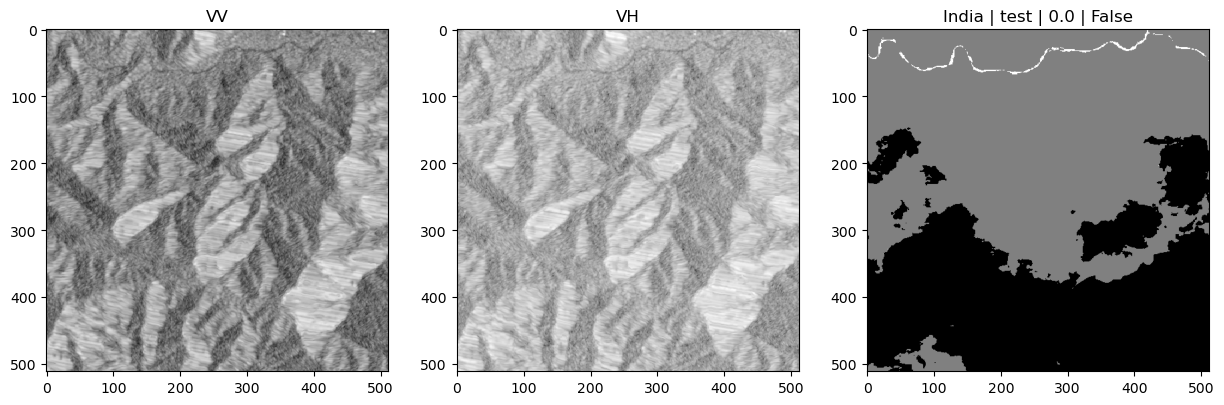

In [5]:
display_random_image(hand_labeled, 'HandLabeled')

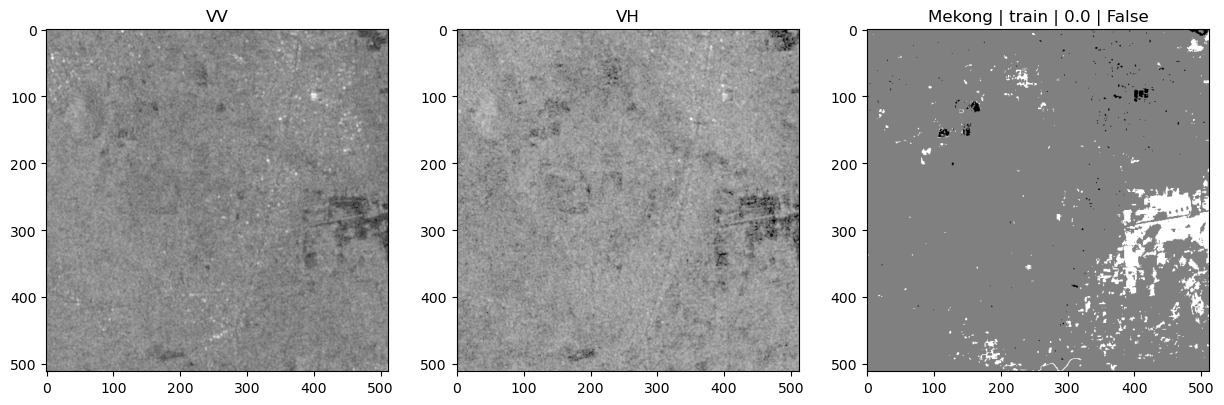

In [6]:
weakly_labeled = pd.read_csv(weak_labeled_data, index_col=0)
display_random_image(weakly_labeled, 'WeaklyLabeled')

In [7]:
import sys
sys.path.append(os.path.join(ROOT, 'src'))
from sen1floods11_dataset import Sen1Floods11Dataset, Sen1Floods11DataModule

/home/gahizon/.conda/envs/sar-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
hl_data = Sen1Floods11Dataset(hand_labeled_data, 'train', 'HandLabeled', 'Flood', batch_size= 8, transforms=['flip', 'rotate', 'distort'])

In [23]:
for i in iter(hl_data):
    print(i['img'].shape)
    break

(3, 512, 512)


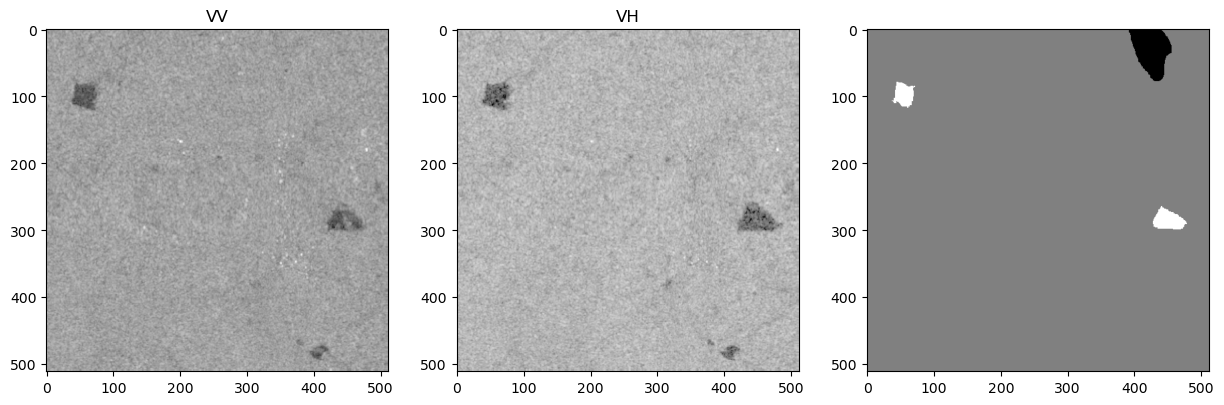

In [29]:
sample = next(iter(hl_data))
display_image(sample['img'], sample['label'])